In [3]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('congestion_dataset.csv')

In [21]:
df.head(2)

,_id,areaId,vehicleCount,avgSpeed,congestionLevel,congestionScore,timestamp,__v
0,6840aa47932e30a284abc1b9,-82_-84,2,47.0,Low,53.0,2025-06-04T20:19:19.717Z,0
1,6840aa47932e30a284abc1bb,19_-111,5,43.6,Moderate,56.4,2025-06-04T20:19:19.722Z,0


In [22]:
df = df[['vehicleCount', 'avgSpeed', 'congestionLevel', 'congestionScore']]
X = df[['vehicleCount', 'avgSpeed']]
y = df['congestionScore']

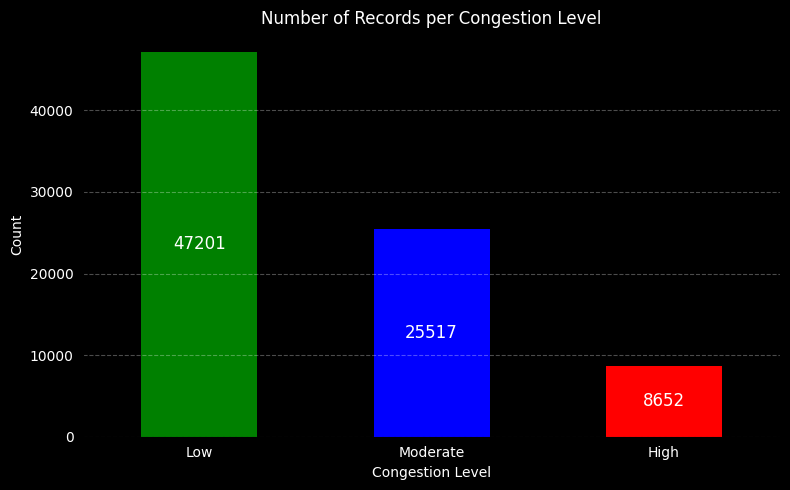

In [48]:
import matplotlib.pyplot as plt

congestion_counts = df['congestionLevel'].value_counts()

levels = ["Low", "Moderate", "High"]
colors = ['green', 'blue', 'red']

plt.figure(figsize=(8, 5), facecolor='black')
ax = congestion_counts.loc[levels].plot(kind='bar', color=colors)

ax.set_facecolor('black')

plt.title("Number of Records per Congestion Level", color='white')
plt.xlabel("Congestion Level", color='white')
plt.ylabel("Count", color='white')
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   
        height / 2,                     
        str(int(height)),               
        ha='center',                   
        va='center',                   
        color='white',                 
        fontsize=12
    )

plt.tight_layout()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 0.00
R2 Score: 1.00


In [51]:
import joblib
joblib.dump(model, 'congestion_model.pkl')

['congestion_model.pkl']